In [1]:
import itertools
import os
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

In [8]:
#Loading model parameters
MODULE_HANDLE = "https://tfhub.dev/google/remote_sensing/uc_merced-resnet50/1"
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32 

In [29]:
from tensorflow.keras.layers import InputLayer, Dense, concatenate

In [56]:
def create_cnn(module_handle, module_name, image_size):
    model = tf.keras.Sequential([
    InputLayer(input_shape = IMAGE_SIZE + (3,)),
    hub.KerasLayer(MODULE_HANDLE, trainable = False, name = module_name),
    Dense(50)])
    return model

In [58]:
def create_mlp(n_channels):
    model = tf.keras.Sequential([
       tf.keras.layers.Dense(32, input_dim=n_channels)                         
    ])
    return model

In [59]:
feature_extractor = create_cnn(MODULE_HANDLE,"Resnet50V2", IMAGE_SIZE)
mlp = create_mlp(n_channels=13)

In [60]:
combined = concatenate([mlp.output, feature_extractor.output])
x = Dense(2, activation="softmax")(combined)

model = tf.keras.Sequential()
model = tf.keras.models.Model(inputs=[mlp.input, feature_extractor.input], outputs=x)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
dense_19_input (InputLayer)     [(None, 13)]         0                                            
__________________________________________________________________________________________________
Resnet50V2 (KerasLayer)         (None, 2048)         23588821    input_9[0][0]                    
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 32)           448         dense_19_input[0][0]             
____________________________________________________________________________________________

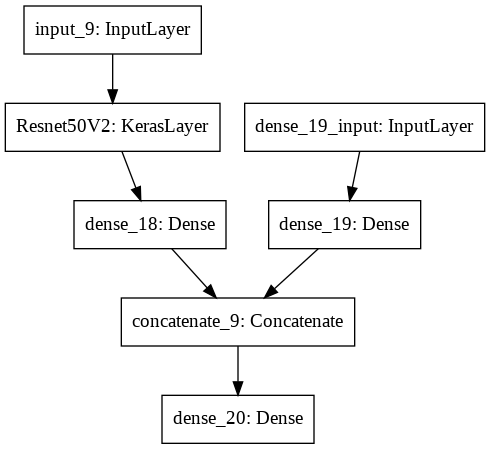

In [61]:
tf.keras.utils.plot_model(model)